In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [12]:
users_df = pd.read_csv("./Data/users_cleaned.csv", index_col=0)
users_df = users_df.reset_index(drop=True)
users_df.head(5)

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847


In [13]:
statistics = users_df[["user_watching", "user_completed","user_onhold", "user_dropped", "user_plantowatch", "user_days_spent_watching"]]

In [14]:
statistics = statistics.to_numpy().astype("float")
statistics

array([[3.000e+00, 4.900e+01, 1.000e+00, ..., 7.430e+00, 0.000e+00,
        3.391e+03],
       [4.500e+01, 1.950e+02, 2.700e+01, ..., 6.150e+00, 6.000e+00,
        4.903e+03],
       [2.500e+01, 4.140e+02, 2.000e+00, ..., 8.270e+00, 1.000e+00,
        9.701e+03],
       ...,
       [6.000e+00, 1.030e+02, 1.000e+01, ..., 7.400e+00, 1.000e+00,
        2.869e+03],
       [2.200e+01, 2.390e+02, 0.000e+00, ..., 8.980e+00, 4.700e+01,
        4.469e+03],
       [1.100e+01, 7.300e+01, 2.000e+00, ..., 8.890e+00, 1.100e+01,
        3.822e+03]])

In [15]:
# # #Normalize the data, since we're using KMeans

# statistics = normalize(statistics, axis=0, norm='l2')

In [16]:
statistics = statistics/np.max(statistics)

62347.0

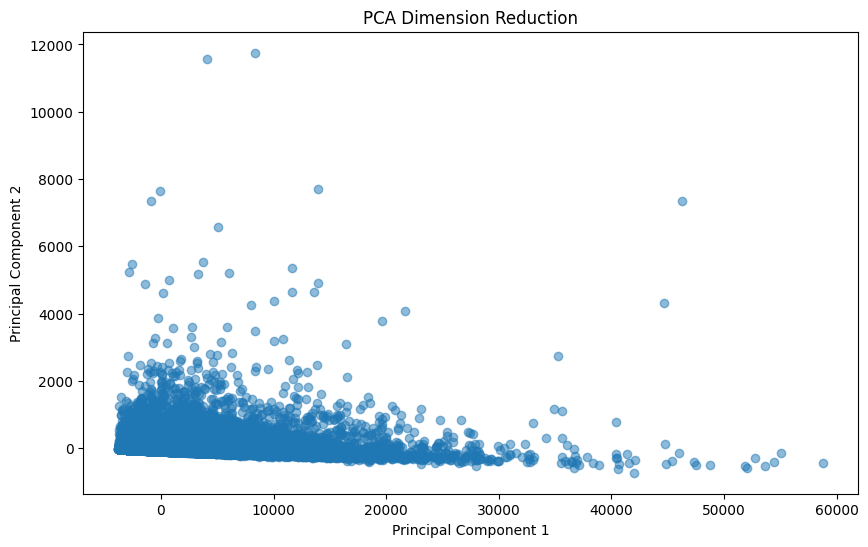

In [17]:
pca = PCA(n_components=2)

result_pca = pca.fit_transform(statistics)

plt.figure(figsize=(10, 6))
plt.scatter(result_pca[:, 0], result_pca[:, 1], alpha=0.5)
plt.title('PCA Dimension Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

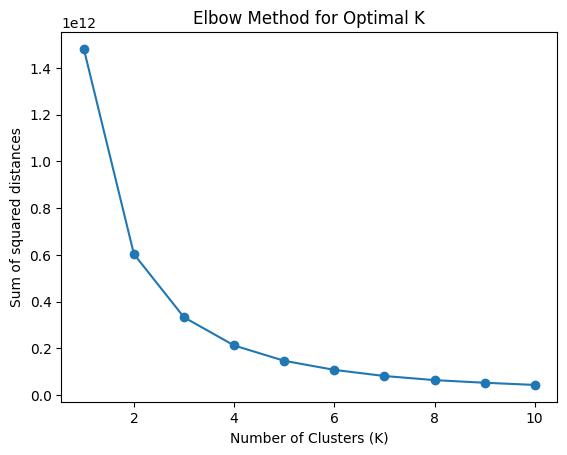

In [18]:
from sklearn.cluster import KMeans


sum_squared_distances = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2023)
    kmeans.fit(statistics)
    sum_squared_distances.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K_range, sum_squared_distances, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()


In [19]:
#Choose 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=2023)
kmeans.fit(statistics)

/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=2023)

In [20]:
cluster_ids = kmeans.labels_
cluster_ids = list(cluster_ids)

In [21]:
tsne = TSNE(n_components=2, random_state=42)

# Fit the data and transform it to 2 dimensions
result_tsne = tsne.fit_transform(statistics)

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], c=cluster_ids, cmap='viridis', alpha=0.5)
plt.title('PCA Dimension Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

NameError: name 'TSNE' is not defined

In [ ]:
#Find properties for each clusters
users_df["cluster_id"] = list(cluster_ids)
users_df = users_df.drop(columns=["user_watching", "user_completed","user_onhold", "user_dropped", "user_plantowatch", "user_days_spent_watching"])

In [ ]:
users_df.head(1)

,user_id,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,cluster_id
0,2255153,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,1


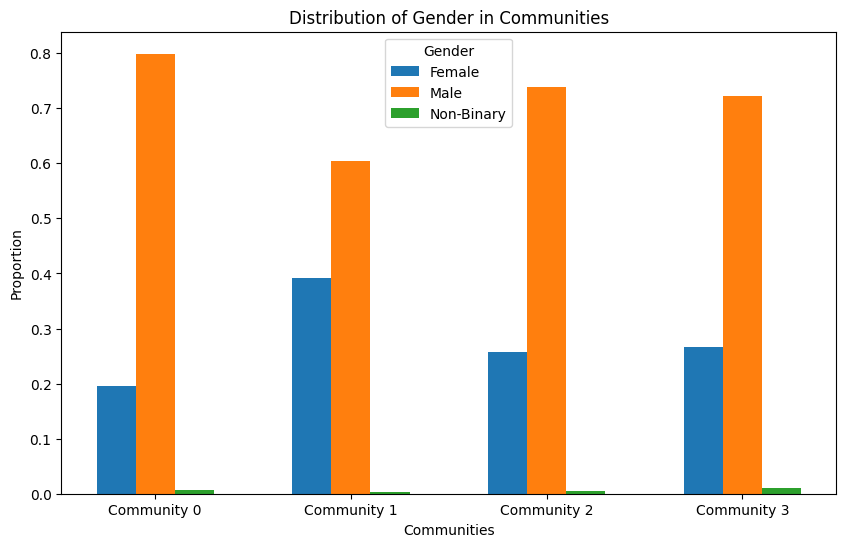

In [ ]:
genders = ['Female', 'Male', 'Non-Binary']
values = []
communities = []
for i in range(4): # 4 clusters
    anime_community = users_df[users_df["cluster_id"] == i]
    gender_unique, gender_counts = np.unique(anime_community['gender'].to_list(), return_counts=True)
    gender_counts = np.round(gender_counts/np.sum(gender_counts),3)
    dict_gen = {}
    for j in range(len(gender_unique)):
        dict_gen[gender_unique[j]] = gender_counts[j]
    values.append([dict_gen[k] for k in genders])
    communities.append(f"Community {i}")

values = np.asarray(values)
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = np.arange(len(communities))

for i, gender in enumerate(genders):
    ax.bar(bar_positions + i * bar_width, values[:, i], width=bar_width, label=gender)

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(communities)
ax.set_xlabel('Communities')
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Gender in Communities')
ax.legend(title='Gender')

plt.show()

    

In [ ]:
from datetime import datetime
def get_time_period(begin_time):
    #2016 is the year that this dataset is collected
    dob_date = datetime.strptime(begin_time, "%Y-%m-%d %H:%M:%S")
    current_date = datetime.now()
    years = 2016 - dob_date.year - ((current_date.month, current_date.day) < (dob_date.month, dob_date.day))
    return years

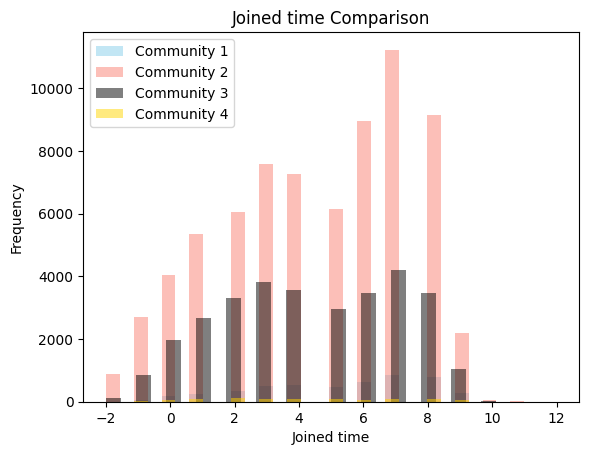

In [ ]:
colors = ['skyblue', 'salmon', 'black', 'gold']
for i in range(4):
    join_time = users_df[users_df["cluster_id"] == i]["join_date"].to_list()
    join_time = [get_time_period(join_day) for join_day in join_time]
    plt.hist(join_time, bins=30, alpha=0.5, label=f'Community {i+1}', color= colors[i])
# Add labels and title
plt.xlabel('Joined time')
plt.ylabel('Frequency')
plt.title('Joined time Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()

communities 0 has 4868 persons
communities 1 has 71587 persons
communities 2 has 31437 persons
communities 3 has 819 persons


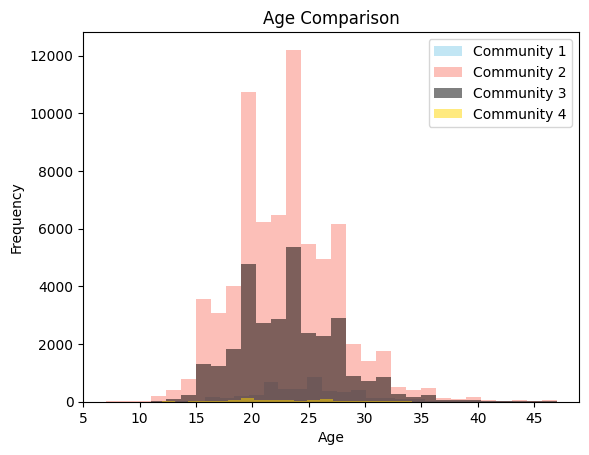

In [ ]:
colors = ['skyblue', 'salmon', 'black', 'gold']
for i in range(4):
    age = users_df[users_df["cluster_id"] == i]["birth_date"].to_list()
    age = [get_time_period(birthday) for birthday in age]
    print(f"communities {i} has {len(age)} persons")
    plt.hist(age, bins=30, alpha=0.5, label=f'Community {i+1}', color= colors[i])
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()